# Exploratory Data Analysis using Zomato Restaurants Dataset

## Problem Statement

The zomato exploratory data analysis is for the foodies to find the best restaurants, value for money restaurants in their locality. It also helps to find their required cuisines in their locality.  

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
plt.rcParams["figure.figsize"] = [16,9]

## Read Data

In [2]:
data=pd.read_csv('ZomatoRestaurantsIndia.csv')

## Prepare the Data

**1. Check dimensions of the dataframe in terms of rows and columns**

In [3]:
data.shape

(211944, 26)

**2. View the head of the data**

In [4]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


**3. Note the redundant variables and drop them**

In [5]:
data.drop(["locality_verbose","opentable_support","takeaway","res_id","url"],axis=1,inplace=True)
data.shape

(211944, 21)

**4. Check the data types. Ensure that data types are not as per business context**


In [6]:
data.dtypes

name                     object
establishment            object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
delivery                  int64
dtype: object

#### Change the incorrect data type

In [7]:
convert_dict = {'city_id': object,'country_id':object,'price_range':object,'delivery':object,'latitude':object,'longitude':object } 
data = data.astype(convert_dict) 
print(data.dtypes)

name                     object
establishment            object
address                  object
city                     object
city_id                  object
locality                 object
latitude                 object
longitude                object
zipcode                  object
country_id               object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range              object
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
delivery                 object
dtype: object


**5. Check for Duplicates**

In [8]:
data.duplicated().value_counts()
data=data.drop_duplicates()
data.shape

(60406, 21)

## Understand the variables

**1. Variable 'name'**

In [9]:
print(data.name.describe())
print(data.name.dtypes)
print(data.name.nunique())
print(data.name.isnull().any())

print("No.of rows=60406,Total Uniques=40965,Frequent element=Dominos Pizza and count=413,data type =Object,Null values = False")

count             60406
unique            40965
top       Dominos Pizza
freq                413
Name: name, dtype: object
object
40965
False
No.of rows=60406,Total Uniques=40965,Frequent element=Dominos Pizza and count=413,data type =Object,Null values = False


**2. Variable 'establishment'**

In [10]:
print(data.establishment.describe())
print(data.establishment.dtypes)
print(data.establishment.nunique())
print(data.establishment.isnull().any())
print("No. of rows=58486,Total Uniques=26,Frequent element=Quick Bites and count=15473,data type =Object,Null values = True")

count           58486
unique             26
top       Quick Bites
freq            15473
Name: establishment, dtype: object
object
26
True
No. of rows=58486,Total Uniques=26,Frequent element=Quick Bites and count=15473,data type =Object,Null values = True


**3. Variable 'city'**

In [11]:
print(data.city.describe())
print(data.city.dtypes)
print(data.city.nunique())
print(data.city.isnull().any())
print("No. of rows=60411,Total Uniques=98,Frequent element=Chennai and count=2612,data type =Object,Null values = False")

count       60406
unique         98
top       Chennai
freq         2612
Name: city, dtype: object
object
98
False
No. of rows=60411,Total Uniques=98,Frequent element=Chennai and count=2612,data type =Object,Null values = False


**Let us find the count of restaurants in each city**

In [12]:
cities_unique=(data.city.unique())
count_rest_city=data.groupby("city").count()
count_rest_city.iloc[:,1]

city
Agra           879
Ahmedabad     1283
Ajmer          461
Alappuzha      266
Allahabad      551
              ... 
Varanasi       585
Vellore        324
Vijayawada     512
Vizag          709
Zirakpur       151
Name: establishment, Length: 98, dtype: int64

**4. Variable 'locality'**

In [13]:
print(data.locality.describe())
print(data.locality.dtypes)
print(data.locality.nunique())
print(data.locality.isnull().any())
print("No. of rows=60406,Total Uniques=3731,Frequent element=Civil Lines and count=804,data type =Object,Null values = False")

count           60406
unique           3731
top       Civil Lines
freq              804
Name: locality, dtype: object
object
3731
False
No. of rows=60406,Total Uniques=3731,Frequent element=Civil Lines and count=804,data type =Object,Null values = False


**4. Variable 'latitude'**

From the variable 'latitude', we know the latitudinal location of the restaurant

The Latitudinal extent of India 8º4‛N to 37º6‛ N. 

We must check whether we have any points beyond this extent.

In [14]:
print("Total number of values beyond the extend :",data.latitude[(data["latitude"]<8.066667) | (data["latitude"]>37.1)].count())
data.latitude.replace(data.latitude[(data["latitude"]<8.066667) | (data["latitude"]>37.1)],np.nan,inplace=True)
print("Total number of values beyond the extend after replace:",data.latitude[(data["latitude"]<8.066667) | (data["latitude"]>37.1)].count())


Total number of values beyond the extend : 955
Total number of values beyond the extend after replace: 0


**5. Variable 'longitude'**

From the variable 'longitude', we know the longitudinal location of the restaurant

The Longitudinal extent of India is from 68°7'E to 97°25'E

We must check whether we have any points beyond this extent.

Total number of values beyond the extend : 957
Total number of values beyond the extend after replace: 0


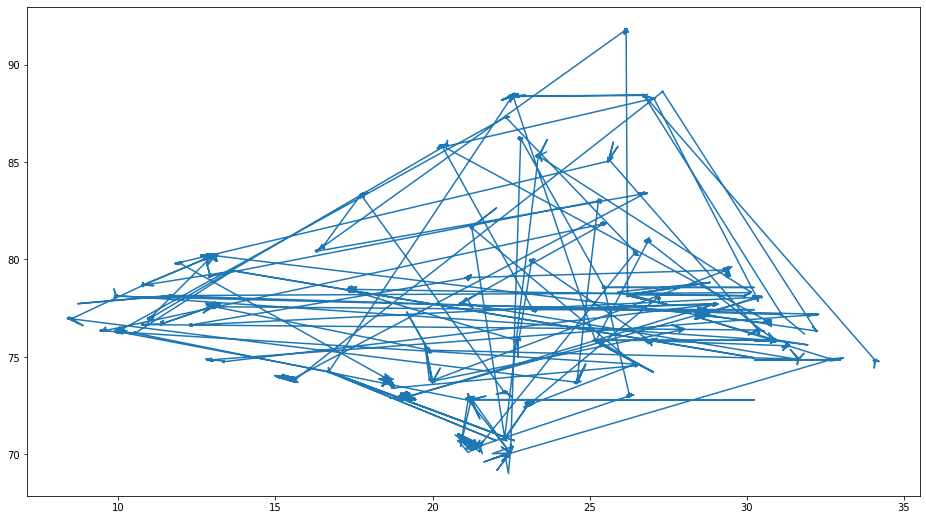

In [15]:
print("Total number of values beyond the extend :",data.longitude[(data["longitude"]<68.11666667) | (data["latitude"]>97.41666667)].count())
data.longitude.replace(data.longitude[(data["longitude"]<68.11666667) | (data["longitude"]>97.41666667)],np.nan,inplace=True)
print("Total number of values beyond the extend after replace:",data.longitude[(data["longitude"]<68.11666667) | (data["longitude"]>97.41666667)].count())
plt.plot(data.latitude,data.longitude)
plt.show()

**6. Variable 'cuisines'**

In [16]:
print(data.cuisines.describe())
print(data.cuisines.dtypes)
print(data.cuisines.nunique())
print(data.cuisines.isnull().any())
print("No. of rows=59936,Total Uniques=9382,Frequent element=North Indian and count=4586,data type =Object,Null values = True")

count            59936
unique            9382
top       North Indian
freq              4586
Name: cuisines, dtype: object
object
9382
True
No. of rows=59936,Total Uniques=9382,Frequent element=North Indian and count=4586,data type =Object,Null values = True


- To find the unique cusines we write a small user defined function.



In [17]:
def findUnique(data_cuisines):
    out=(data_cuisines.unique())
    return out
unique_cuisines=findUnique(data.cuisines)
print(unique_cuisines)

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


- find out the frequency of each cuisine

In [18]:
cuisine_freq=data.groupby("cuisines").count()
cuisine_freq.iloc[:,1]

cuisines
Afghan                                                     5
Afghan, American                                           1
Afghan, Arabian, BBQ, Beverages, Biryani, Maharashtrian    1
Afghan, Arabian, BBQ, Beverages, Burger                    1
Afghan, Arabian, Biryani                                   1
                                                          ..
Wraps, Sandwich, Pizza, BBQ                                1
Wraps, Sandwich, Pizza, Bakery                             1
Wraps, Sandwich, Rolls, Fast Food, Burger                  0
Wraps, Sandwich, Rolls, Pizza, Burger                      2
Wraps, Sandwich, Salad, Pizza, Burger, Beverages           1
Name: establishment, Length: 9382, dtype: int64

**8. Variable 'average_cost_for_two'**

In [19]:
print(data.average_cost_for_two.describe())
print(data.average_cost_for_two.dtypes)
print(data.average_cost_for_two.nunique())
print(data.average_cost_for_two.isnull().any())
print("No.of rows=60406,mean=538.30,Standard Deviation=593.85,Media of Lower Half=200,Median=400,Median of Upper Half=600")
print("Data type =int64,Null values = False")

count    60406.000000
mean       538.317286
std        593.869493
min          0.000000
25%        200.000000
50%        400.000000
75%        600.000000
max      30000.000000
Name: average_cost_for_two, dtype: float64
int64
145
False
No.of rows=60406,mean=538.30,Standard Deviation=593.85,Media of Lower Half=200,Median=400,Median of Upper Half=600
Data type =int64,Null values = False


**9. Variable 'price_range'**

In [20]:
print(data.price_range.describe())
print(data.price_range.dtypes)
print(data.price_range.nunique())
print(data.price_range.isnull().any())
print(data.price_range.value_counts())
print("No. of rows=60406,Total Uniques=4,Frequent element=1 and count=30672,data type =Object,Null values = False")

count     60406
unique        4
top           1
freq      30672
Name: price_range, dtype: int64
object
4
False
1    30672
2    18377
3     8299
4     3058
Name: price_range, dtype: int64
No. of rows=60406,Total Uniques=4,Frequent element=1 and count=30672,data type =Object,Null values = False


- Visualizing using an exploded pie chart.

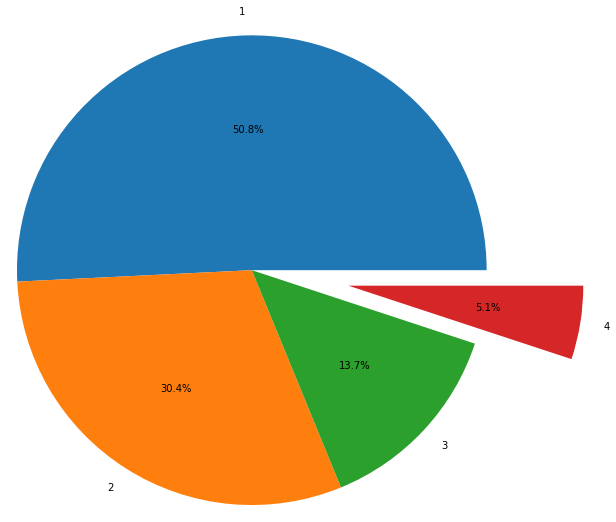

1,2,3,4 represents the price ranges


In [21]:
plt.pie(data.price_range.value_counts(),autopct='%0.1f%%',radius=1.2,labels=['1','2','3','4'],explode=[0,0,0,0.5])
plt.show()
print("1,2,3,4 represents the price ranges")

**10. Variable 'highlights'**

In [22]:
print(data.highlights.describe())
print(data.highlights.dtypes)
print(data.highlights.nunique())
print(data.highlights.isnull().any())
print("No. of rows=59668,Total Uniques=31454,Frequent element=Dinner, Takeaway Available, Lunch, Cash, Indoor Seating and count=925,data type =Object,Null values = True")

count                                                 59663
unique                                                31454
top       Dinner, Takeaway Available, Lunch, Cash, Indoo...
freq                                                    925
Name: highlights, dtype: object
object
31454
True
No. of rows=59668,Total Uniques=31454,Frequent element=Dinner, Takeaway Available, Lunch, Cash, Indoor Seating and count=925,data type =Object,Null values = True


- Function to know the number of times a facility has appeared in the 'Highlights'.

In [23]:
def findUnique(data_high):
    return data.highlights.value_counts().idxmax()

- Facility occurs most number of times in the data.

In [24]:
most=findUnique(data.highlights)
print(most,'\t',data.highlights[data.highlights==most].count())

Dinner, Takeaway Available, Lunch, Cash, Indoor Seating 	 925


**11. Variable 'aggregate_rating'** 



In [25]:
print(data.aggregate_rating.describe()) 
print(data.aggregate_rating.dtypes)
print(data.aggregate_rating.nunique())
print(data.aggregate_rating.isnull().any())
print("No.of rows=60406,mean=3.032794,Standard Deviation=1.440785,Median of Lower Half=2.9,Median=3.5,Median of Upper Half=4")
print("Data type =float64,Null values = False")

count    60406.000000
mean         3.033045
std          1.440580
min          0.000000
25%          2.900000
50%          3.500000
75%          4.000000
max          4.900000
Name: aggregate_rating, dtype: float64
float64
33
False
No.of rows=60406,mean=3.032794,Standard Deviation=1.440785,Median of Lower Half=2.9,Median=3.5,Median of Upper Half=4
Data type =float64,Null values = False


**12. Variable 'rating_text'**



In [26]:
print(data.rating_text.describe()) 
print(data.rating_text.dtypes)
print(data.rating_text.nunique())
print(data.rating_text.isnull().any())
print("No. of rows=60406,Total Uniques=39,Frequent element=Good and count=17569,data type =Object,Null values = False")

count     60406
unique       39
top        Good
freq      17569
Name: rating_text, dtype: object
object
39
False
No. of rows=60406,Total Uniques=39,Frequent element=Good and count=17569,data type =Object,Null values = False


**13. Variable 'votes'**

In [27]:
print(data.votes.describe()) 
print(data.votes.dtypes)
print(data.votes.nunique())
print(data.votes.isnull().any())
print("No.of rows=60406,mean=261.5082,Standard Deviation=728.0725,Median of Lower Half=7,Median=42,Median of Upper Half=207")
print("Data type =int64,Null values = False")

count    60406.000000
mean       261.529865
std        728.098809
min          0.000000
25%          7.000000
50%         42.000000
75%        207.000000
max      42539.000000
Name: votes, dtype: float64
int64
2642
False
No.of rows=60406,mean=261.5082,Standard Deviation=728.0725,Median of Lower Half=7,Median=42,Median of Upper Half=207
Data type =int64,Null values = False


**14. Variable 'photo_count'**

In [28]:
print(data.photo_count.describe()) 
print(data.photo_count.dtypes)
print(data.photo_count.nunique())
print(data.photo_count.isnull().any())
print("No.of rows=60406,mean=193.9693,Standard Deviation=702.1118,Median of Lower Half=1,Median=11,Median of Upper Half=82")
print("Data type =int64,Null values = False")

count    60406.000000
mean       193.985448
std        702.138692
min          0.000000
25%          1.000000
50%         11.000000
75%         82.000000
max      17702.000000
Name: photo_count, dtype: float64
int64
2514
False
No.of rows=60406,mean=193.9693,Standard Deviation=702.1118,Median of Lower Half=1,Median=11,Median of Upper Half=82
Data type =int64,Null values = False


**15. Variable 'delivery'**

In [29]:
print(data.delivery.describe()) 
print(data.delivery.dtypes)
print(data.delivery.nunique())
print(data.delivery.isnull().any())  
print("No. of rows=6040641256,Total Uniques=3,Frequent element=-1 and count=41256,data type =Object,Null values = False")

count     60406
unique        3
top          -1
freq      41256
Name: delivery, dtype: int64
object
3
False
No. of rows=6040641256,Total Uniques=3,Frequent element=-1 and count=41256,data type =Object,Null values = False


## Check for missing values

In [30]:
print(data.isnull().any())

name                    False
establishment            True
address                  True
city                    False
city_id                 False
locality                False
latitude                 True
longitude                True
zipcode                  True
country_id              False
cuisines                 True
timings                  True
average_cost_for_two    False
price_range             False
currency                False
highlights               True
aggregate_rating        False
rating_text             False
votes                   False
photo_count             False
delivery                False
dtype: bool


## Study summary statistics

Let us check the summary statistics for numerical variables.

In [31]:
print("average_cost_for_two :")
print("No.of rows = 60411,mean=538.290940,Standard Deviation=593.85285,Median of Lower Half=200,Median of data=400,Median of Upper Half=600,Maximum value=30000")

print("\naggregate_rating :")
print("No.of rows=60411,mean=3.032794,Standard Deviation=1.440785,Median of Lower Half=2.9,Median=3.5,Median of Upper Half=4,Maximum value=4.9")

print("\nvotes :")
print("No.of rows=60411,mean=261.5082,Standard Deviation=728.0725,Median of Lower Half=7,Median=42,Median of Upper Half=207,Maximum value=42539")

print("\nphoto_count :")
print("No.of rows=60411,mean=193.9693,Standard Deviation=702.1118,Median of Lower Half=1,Median=11,Median of Upper Half=82,Maximum value=17702")
data.describe()


average_cost_for_two :
No.of rows = 60411,mean=538.290940,Standard Deviation=593.85285,Median of Lower Half=200,Median of data=400,Median of Upper Half=600,Maximum value=30000

aggregate_rating :
No.of rows=60411,mean=3.032794,Standard Deviation=1.440785,Median of Lower Half=2.9,Median=3.5,Median of Upper Half=4,Maximum value=4.9

votes :
No.of rows=60411,mean=261.5082,Standard Deviation=728.0725,Median of Lower Half=7,Median=42,Median of Upper Half=207,Maximum value=42539

photo_count :
No.of rows=60411,mean=193.9693,Standard Deviation=702.1118,Median of Lower Half=1,Median=11,Median of Upper Half=82,Maximum value=17702


,latitude,longitude,average_cost_for_two,aggregate_rating,votes,photo_count
count,59451.000000,59449.000000,60406.000000,60406.000000,60406.000000,60406.000000
mean,21.523167,77.819681,538.317286,3.033045,261.529865,193.985448
std,6.458867,4.281413,593.869493,1.440580,728.098809,702.138692
min,8.384243,69.014446,0.000000,0.000000,0.000000,0.000000
25%,16.694940,74.844725,200.000000,2.900000,7.000000,1.000000
50%,22.466652,77.178694,400.000000,3.500000,42.000000,11.000000
75%,26.755303,79.940275,600.000000,4.000000,207.000000,82.000000
max,34.214702,91.832769,30000.000000,4.900000,42539.000000,17702.000000


## Study correlation

INFERENCE :
aggregate_rating & average_cost_for_two =>(0.250045) => Weak poisitve Relation
aggregate_rating & photo_count =>(0.231656) => Weak poisitve Relation
aggregate_rating & votes =>(0.283375) => Weak poisitve Relation
average_cost_for_two & photo_count =>(0.330854) => Weak poisitve Relation
average_cost_for_two & votes =>(0.263601) => Weak poisitve Relation
photo_count & votes =>(0.685662) => Strong poisitve Relation


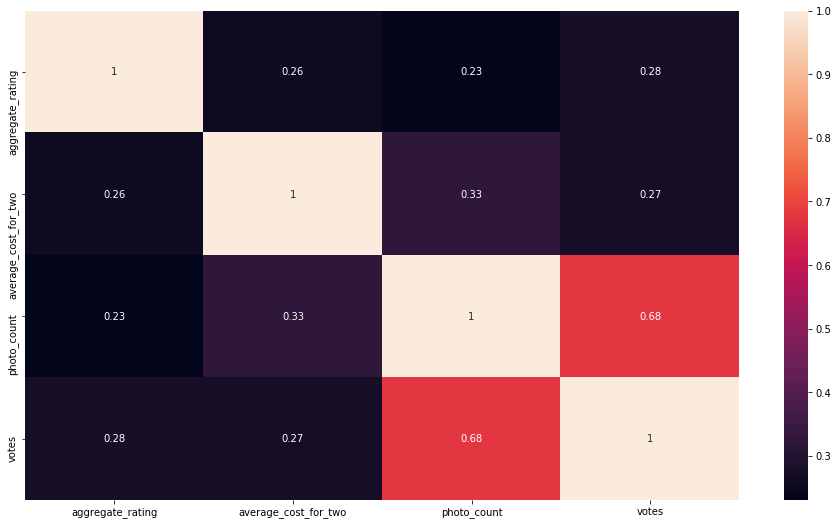

In [33]:
corr_matrix=data[["aggregate_rating","average_cost_for_two","photo_count","votes"]].corr()
print("INFERENCE :")
print("aggregate_rating & average_cost_for_two =>(0.250045) => Weak poisitve Relation")
print("aggregate_rating & photo_count =>(0.231656) => Weak poisitve Relation")
print("aggregate_rating & votes =>(0.283375) => Weak poisitve Relation")
print("average_cost_for_two & photo_count =>(0.330854) => Weak poisitve Relation")
print("average_cost_for_two & votes =>(0.263601) => Weak poisitve Relation")
print("photo_count & votes =>(0.685662) => Strong poisitve Relation")


sb.heatmap(corr_matrix,annot=True)
plt.show()

## Detect outliers

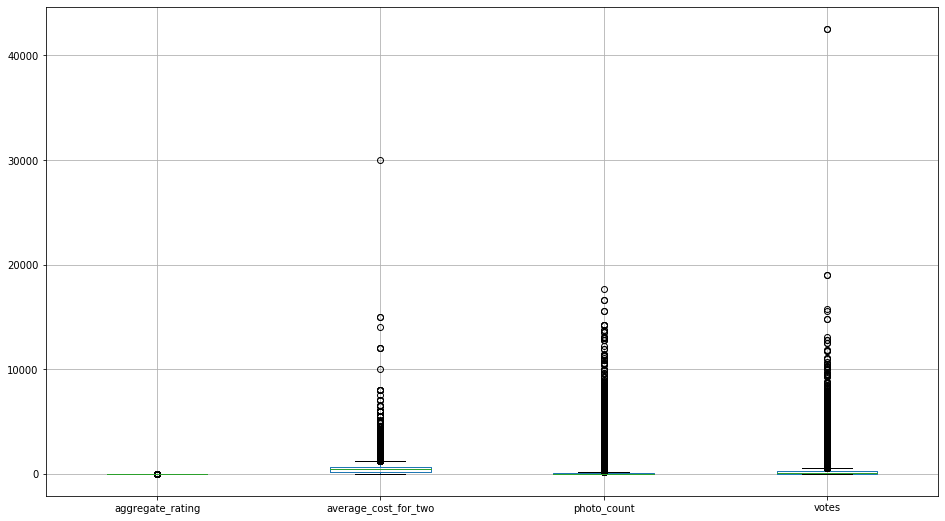

In [40]:
data[["aggregate_rating","average_cost_for_two","photo_count","votes"]].boxplot()

## Create a new variable 'region'


Create a variable 'region' with four categories 'northern','eastern', 'southern', 'western' and 'central'. To do so, use the 'city' column, group all cities belonging to the same region. 

In [41]:
north_india=["Varanasi","Srinagar","Shimla","Rishikesh","Patiala","Nainital","Mussoorie","Meerut","Manali","Ludhiana","Jhansi","Jammu","Jalandhar","Haridwar","Gorakhpur","Dharamshala","Greater Noida","Ghaziabad","Faridabad","Noida","Gurgaon","Dehradun","Delhi", "Chandigarh", "Jaipur", "Lucknow", "Kanpur","New Delhi","Agra","Allahabad","Amritsar","Mohali","Panchkula","Zirakpur","Nayagaon"]
west_india=["Vadodara","Udaipur","Rajkot","Pushkar","Neemrana","Nashik","Navi Mumbai","Thane","Kota","Kolhapur","Junagadh","Jodhpur","Jamnagar","Darjeeling","Mumbai", "Ahmedabad", "Pune", "Goa", "Surat", "Nagpur", "Aurangabad","Gandhinagar","Ajmer","Amravati"]
south_india=["Vizag","Vijayawada","Vellore","Trichy","Tirupati","Salem","Puducherry","Palakkad","Ooty","Mysore","Udupi","Manipal","Mangalore","Madurai","Secunderabad","Guntur","Chennai", "Bangalore", "Hyderabad", "Trivandrum", "Coimbatore", "Kochi","Alappuzha","Thrissur"]
east_india=["Siliguri","Howrah","Kharagpur","Gangtok","Cuttack","Bhubaneshwar","Kolkata", "Patna", "Jamshedpur", "Dhanbad", "Ranchi", "Bhubaneswar","Guwahati", "Agartala", "Dimapur", "Shillong", "Aizawl", "Imphal"]
central_india=["Raipur","Gwalior","Bhopal", "Indore", "Jabalpur"]

def f(data):
    if data in north_india:
        return "northern"
    elif data in south_india:
        return "southern"
    if data in west_india:
        return "western"
    elif data in east_india:
        return "eastern"
    elif data in central_india:
        return "central"
    else:
        return data

data["region"]=data.city.apply(f)
data

,name,establishment,address,city,city_id,locality,latitude,longitude,zipcode,country_id,...,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,region
0,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.2114,78.0024,None,1,...,700,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,-1,northern
1,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.1606,78.0116,282001,1,...,600,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,-1,northern
2,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.1829,77.9797,282010,1,...,300,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,1,northern
3,Bhagat Halwai,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.2057,78.0048,282002,1,...,300,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,1,northern
4,The Salt Cafe Kitchen & Bar,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.1577,78.0524,None,1,...,1000,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,1,northern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,Shree Janta Ice Cream,Dessert Parlour,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.2705,73.1964,None,1,...,200,1,Rs.,"Cash, Takeaway Available, Delivery, Indoor Sea...",2.9,Average,4,1,1,western
211925,The Grand Thakar,Casual Dining,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.3106,73.1712,None,1,...,700,2,Rs.,"Dinner, Cash, Debit Card, Lunch, Takeaway Avai...",4.0,Very Good,111,38,-1,western
211926,Geeta lodge,Casual Dining,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.3177,73.1681,None,1,...,250,1,Rs.,"Dinner, Cash, Credit Card, Lunch, Takeaway Ava...",3.9,Good,207,14,-1,western
211940,Raju Omlet,Quick Bites,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.3225,73.1972,None,1,...,300,1,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.1,Very Good,187,40,1,western


## Some more Analysis

### 1. To find which cities have expensive restaurants 

-  Plot the cities which have costliest restaurants. 

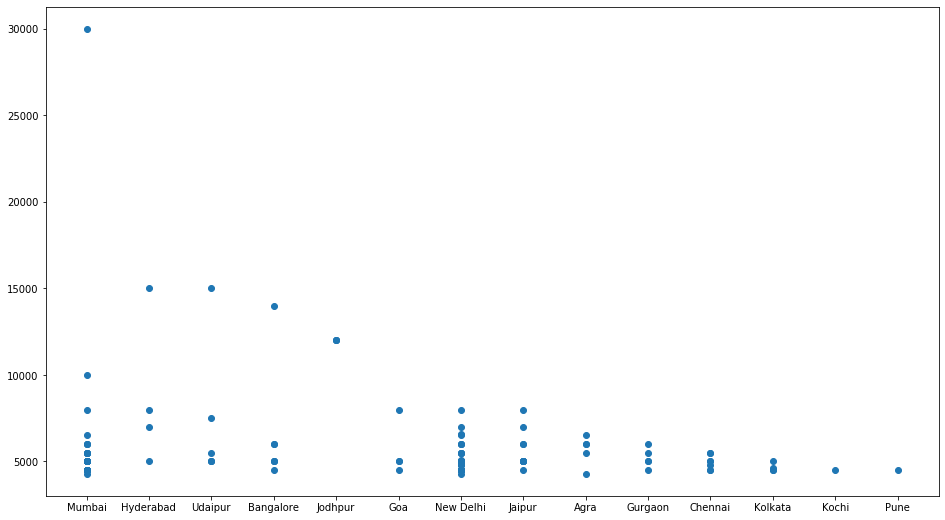

INFERENCE
Mumbai has the costliest restaurant,no. of costliest restaurants is also high
Followed by Hyderabad,Udaipur,Banglore
Delhi has more no. of the costliest restaurent as you can see density of points is high


In [42]:
costly_df=data.sort_values(by="average_cost_for_two",ascending=False).head(150) #sorted by cost in descending,selected top 100 cosliest restaurants
plt.scatter(costly_df.city,costly_df.average_cost_for_two)
plt.show()
print("INFERENCE")
print("Mumbai has the costliest restaurant,no. of costliest restaurants is also high")
print("Followed by Hyderabad,Udaipur,Banglore")
print("Delhi has more no. of the costliest restaurent as you can see density of points is high")


### 2.  Comparing regions

In [43]:
north_highlights=(data.loc[data.region=="northern",:])
south_highlights=(data.loc[data.region=="southern",:])
east_highlights=(data.loc[data.region=="eastern",:])
west_highlights=(data.loc[data.region=="western",:])
def func(region_highlights):
    out=[]
    for each in region_highlights:
        out.append(data.highlights[data.highlights==each].count())
    res = dict(zip(region_highlights, out))
    datacop=pd.DataFrame(res.items())
    return datacop
piv_high_region=data.loc[:, ['highlights', 'region']]
piv_high_region=piv_high_region.replace(np.nan,"None")
uniques_of_highlights=max(piv_high_region.highlights,key=len)
list_of_uniques=list(uniques_of_highlights.split(", "))
print(list_of_uniques)

['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Serves Alcohol', 'Delivery', 'Credit Card', 'Lunch', 'Table booking recommended', 'Table booking not available', 'Digital Payments Accepted', 'Air Conditioned', 'Kid Friendly', 'Smoking Area', 'Brunch', 'DJ', 'Free Parking', 'Live Sports Screening', 'Sports TV', 'Valet Parking Available', 'Outdoor Seating', 'Beer', 'Indoor Seating', 'Serves Cocktails', 'Table booking for Groups', 'Table reservation required', 'Available for Functions', 'Table Reservation Not Required', 'Resto Bar', 'Private Dining Area Available', 'Group Meal', 'Buffet', 'Lunch Menu', 'Live Entertainment', 'Nightlife', 'City View', 'Fullbar', 'Wine', 'Live Music', 'Rooftop']


### 2a. Highlights available in restaurants for different regions

To cater our analysis we define the regions as nothern, eastern, western and southern.

We first need to select the unique facilities available in each region and sort according to their frequencies.


**Highlights of the northern region**

In [44]:
res={}
for each in list_of_uniques:
    res.update({each:piv_high_region.highlights[piv_high_region["highlights"].str.contains(each,regex=False)&(piv_high_region.region=="northern")].count()})
datacop_northern_highlights=pd.DataFrame(res.items())
datacop_northern_highlights=datacop_northern_highlights.sort_values(by=1,ascending=False)
datacop_northern_highlights

,0,1
1,Cash,16829
2,Takeaway Available,15073
22,Indoor Seating,12792
0,Dinner,12642
7,Lunch,12355
6,Credit Card,8158
3,Debit Card,7733
5,Delivery,7720
11,Air Conditioned,7598
10,Digital Payments Accepted,5525


**Highlights of the eastern region**

In [45]:
res={}
for each in list_of_uniques:
    res.update({each:piv_high_region.highlights[piv_high_region["highlights"].str.contains(each,regex=False)&(piv_high_region.region=="eastern")].count()})
datacop_eastern_highlights=pd.DataFrame(res.items())
datacop_eastern_highlights=datacop_eastern_highlights.sort_values(by=1,ascending=False)
datacop_eastern_highlights

,0,1
1,Cash,5864
2,Takeaway Available,5210
22,Indoor Seating,4334
0,Dinner,4106
7,Lunch,3992
11,Air Conditioned,2943
6,Credit Card,2880
3,Debit Card,2667
5,Delivery,2559
10,Digital Payments Accepted,1316


**Highlights of the southern region**

In [46]:
res={}
for each in list_of_uniques:
    res.update({each:piv_high_region.highlights[piv_high_region["highlights"].str.contains(each,regex=False)&(piv_high_region.region=="southern")].count()})
datacop_southern_highlights=pd.DataFrame(res.items())
datacop_southern_highlights=datacop_southern_highlights.sort_values(by=1,ascending=False)
datacop_southern_highlights

,0,1
1,Cash,14753
2,Takeaway Available,13109
22,Indoor Seating,12621
0,Dinner,10897
7,Lunch,10497
6,Credit Card,9401
3,Debit Card,8598
11,Air Conditioned,7125
5,Delivery,6855
10,Digital Payments Accepted,2895


**Highlights of the western region**

In [47]:
res={}
for each in list_of_uniques:
    res.update({each:piv_high_region.highlights[piv_high_region["highlights"].str.contains(each,regex=False)&(piv_high_region.region=="western")].count()})
datacop_western_highlights=pd.DataFrame(res.items())
datacop_western_highlights=datacop_western_highlights.sort_values(by=1,ascending=False)
datacop_western_highlights

,0,1
1,Cash,16087
2,Takeaway Available,13802
22,Indoor Seating,12123
0,Dinner,11314
7,Lunch,10558
6,Credit Card,8884
3,Debit Card,8175
5,Delivery,7839
11,Air Conditioned,7112
10,Digital Payments Accepted,5380


#### Plot the barplot for different regions

We shall now plot the graphs for top 10 highlights.

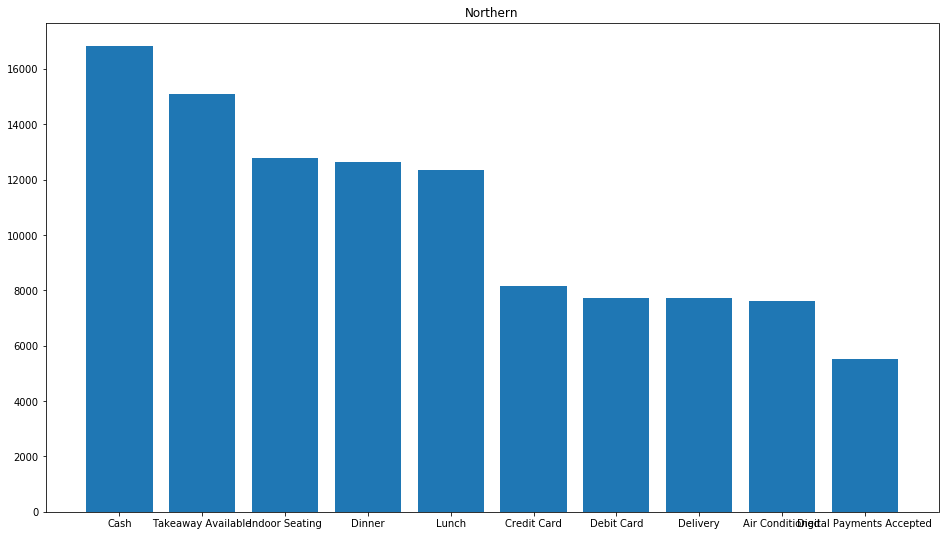

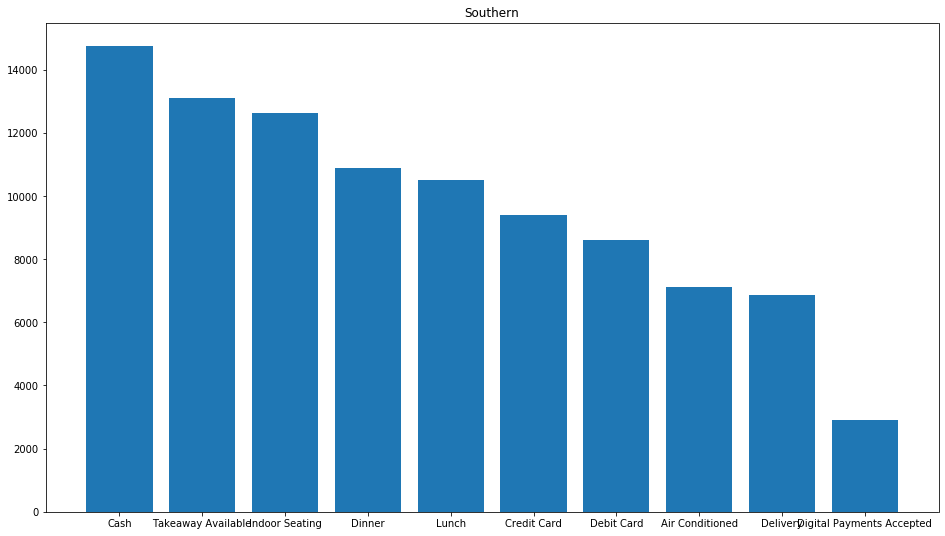

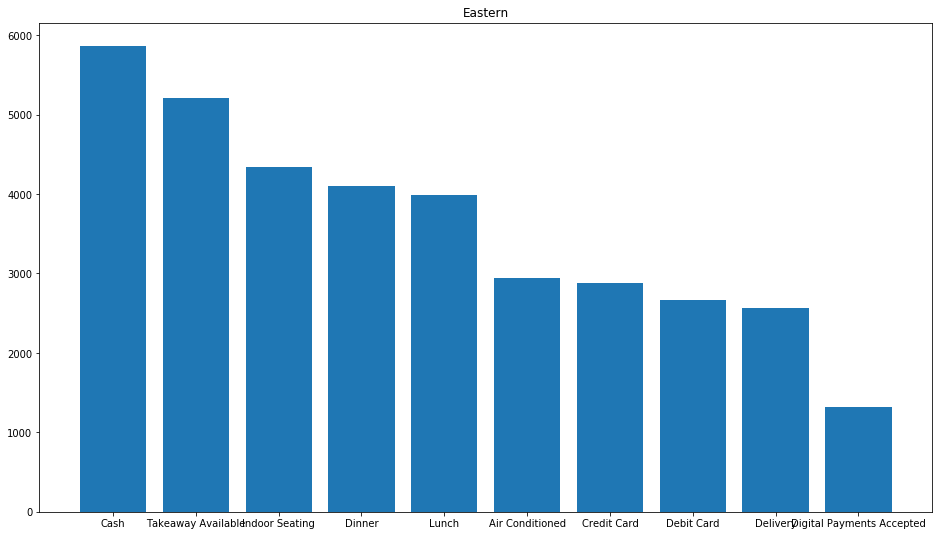

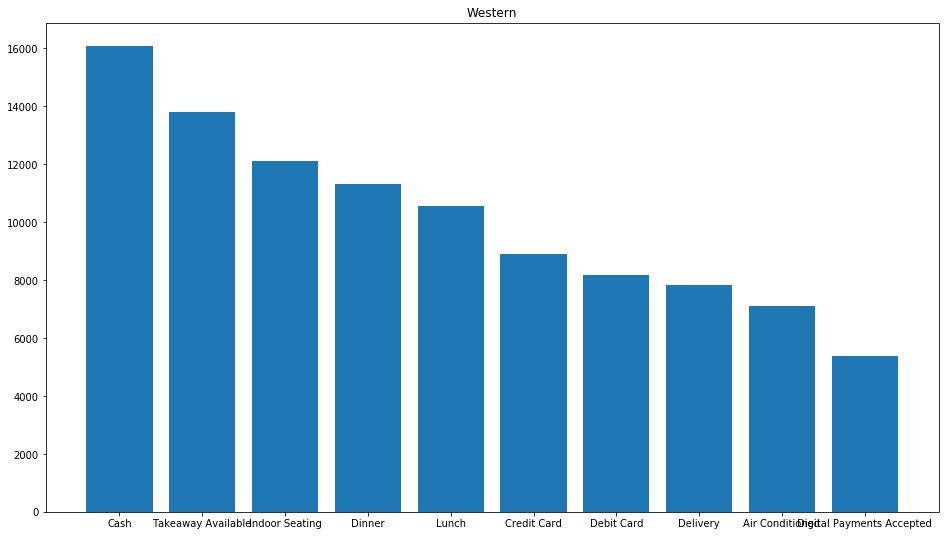

In [48]:
datacop_northern_highlights=datacop_northern_highlights.head(10)
plt.bar(datacop_northern_highlights[0],datacop_northern_highlights[1])
plt.title("Northern")
plt.show()

datacop_southern_highlights=datacop_southern_highlights.head(10)
plt.bar(datacop_southern_highlights[0],datacop_southern_highlights[1])
plt.title("Southern")
plt.show()

datacop_eastern_highlights=datacop_eastern_highlights.head(10)
plt.bar(datacop_eastern_highlights[0],datacop_eastern_highlights[1])
plt.title("Eastern")
plt.show()

datacop_western_highlights=datacop_western_highlights.head(10)
plt.bar(datacop_western_highlights[0],datacop_western_highlights[1])
plt.title("Western")
plt.show()


### 2b. Cuisines available in restaurants for different regions

**Cuisines in the northern region**

In [49]:
north_cuisines=north_highlights.groupby("cuisines").count()
north_cuisines=north_cuisines.sort_values("name",ascending=False)
north_cuisines.reset_index(inplace=True)
north_cuisines.iloc[:,0:2]

,cuisines,name
0,North Indian,2261
1,Fast Food,693
2,"North Indian, Chinese",624
3,Bakery,488
4,Street Food,417
...,...,...
3069,"Desserts, Pizza, Fast Food, Momos, Frozen Yogurt",1
3070,"Desserts, Salad, Healthy Food, Pizza, Frozen Y...",1
3071,"Desserts, Sandwich, Bakery, Beverages",1
3072,"Desserts, South Indian, North Indian, Chinese",1


**Cuisines in the eastern region**

In [50]:
east_cuisines=east_highlights.groupby("cuisines").count()
east_cuisines=east_cuisines.sort_values("name",ascending=False)
east_cuisines.reset_index(inplace=True)
east_cuisines.iloc[:,0:2]

,cuisines,name
0,"North Indian, Chinese",341
1,North Indian,313
2,Fast Food,231
3,Bakery,197
4,Mithai,176
...,...,...
1428,"Desserts, Chinese, Biryani, Beverages",1
1429,"Desserts, Coffee, Beverages, Sandwich, Italian",1
1430,"Desserts, European, Fast Food",1
1431,"Desserts, Fast Food, Pizza, North Indian, Bakery",1


**Cuisines in the southern region**

In [51]:
south_cuisines=south_highlights.groupby("cuisines").count()
south_cuisines=south_cuisines.sort_values("name",ascending=False)
south_cuisines.reset_index(inplace=True)
south_cuisines.iloc[:,0:2]

,cuisines,name
0,South Indian,1143
1,Bakery,450
2,North Indian,298
3,Finger Food,246
4,Fast Food,239
...,...,...
3360,"Healthy Food, Sandwich",1
3361,"Healthy Food, Salad, Sandwich, Beverages",1
3362,"Healthy Food, Salad, Mexican, Beverages",1
3363,"Healthy Food, Salad, Mediterranean",1


**Cuisines in the western region** 

In [52]:
west_cuisines=west_highlights.groupby("cuisines").count()
west_cuisines=west_cuisines.sort_values("name",ascending=False)
west_cuisines.reset_index(inplace=True)
west_cuisines.iloc[:,0:2]

,cuisines,name
0,North Indian,1180
1,Fast Food,809
2,Street Food,474
3,Cafe,427
4,"North Indian, Chinese",398
...,...,...
3480,"Fast Food, Cafe, Beverages",1
3481,"Fast Food, Cafe, Desserts, Beverages",1
3482,"Fast Food, Cafe, Ice Cream, Burger, Beverages",1
3483,"Fast Food, Cafe, North Indian",1


- Plot the barplot for top 10 cuisines served in the four regions

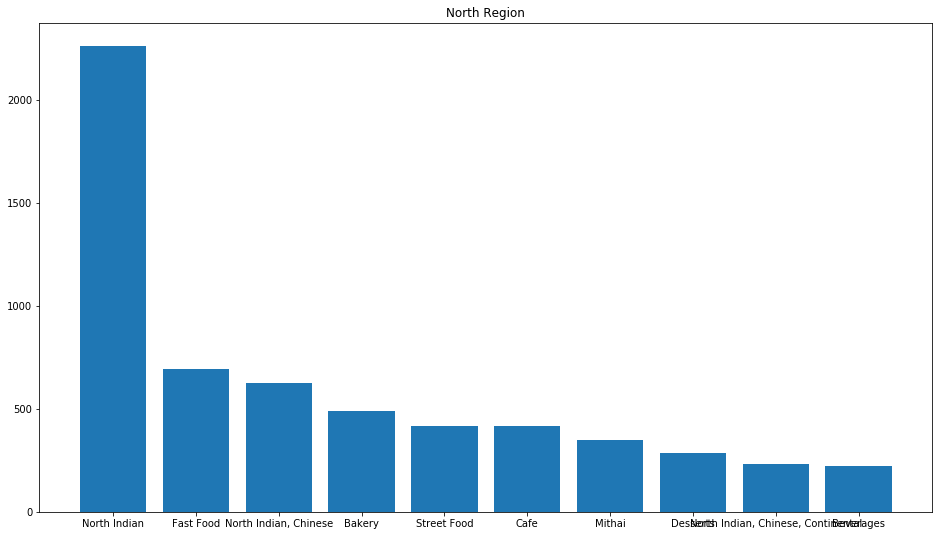

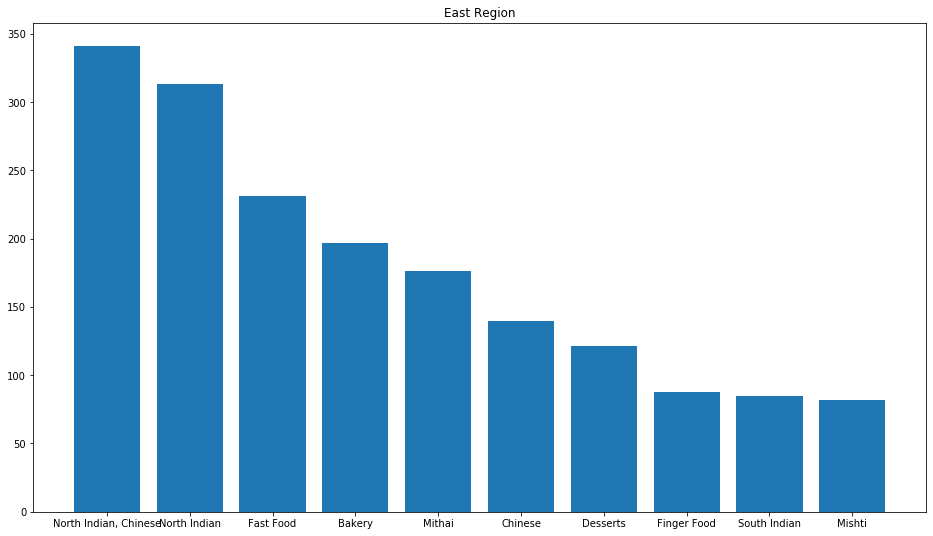

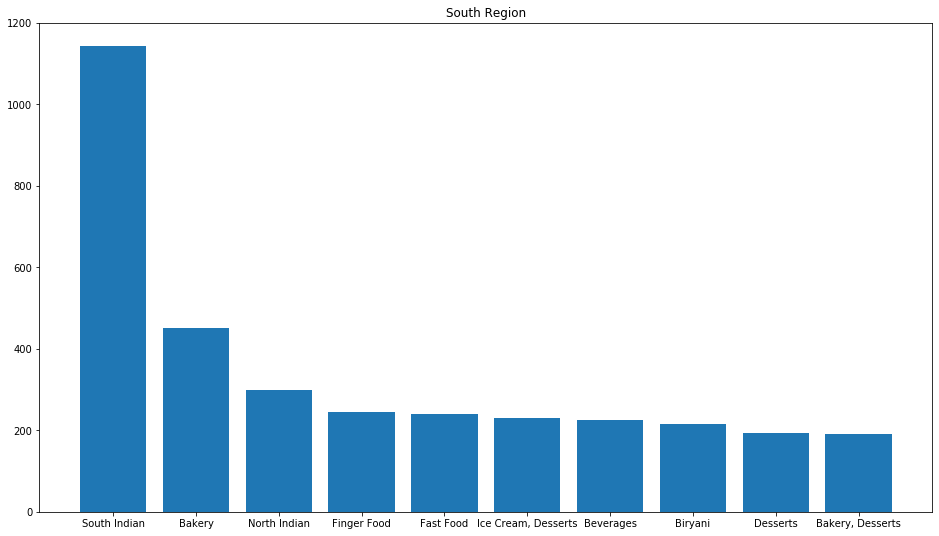

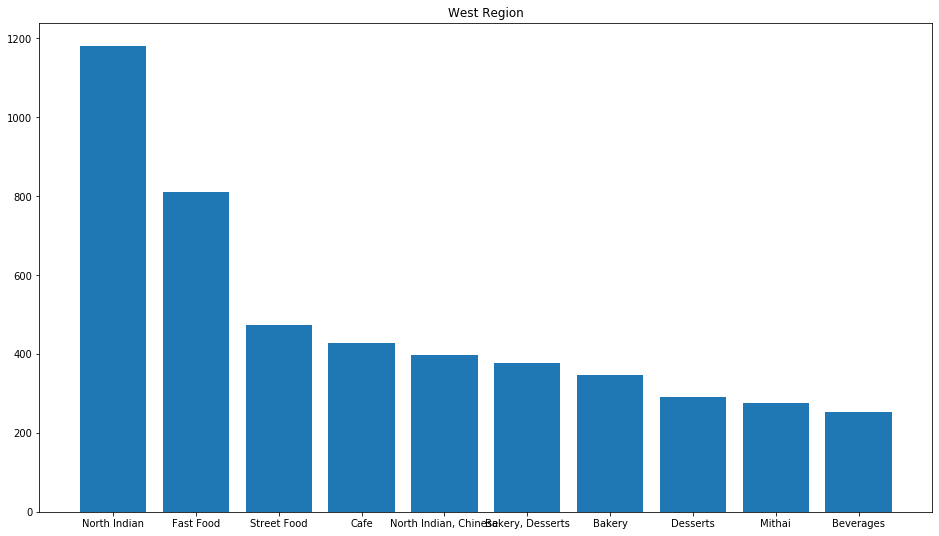

In [53]:
north_cuisines=north_cuisines.head(10)
plt.bar(north_cuisines["cuisines"],north_cuisines["name"])
plt.title("North Region")
plt.show()

east_cuisines=east_cuisines.head(10)
plt.bar(east_cuisines["cuisines"],east_cuisines["name"])
plt.title("East Region")
plt.show()

south_cuisines=south_cuisines.head(10)
plt.bar(south_cuisines["cuisines"],south_cuisines["name"])
plt.title("South Region")

plt.show()

west_cuisines=west_cuisines.head(10)
plt.bar(west_cuisines["cuisines"],west_cuisines["name"])
plt.title("West Region")

plt.show()


###  3. The Northern Region

**Now we shall consider only the northern region**

**1. The top 10 cuisines served in Restaurants** 

In [54]:
north_cuisines.cuisines.head(10)

0                          North Indian
1                             Fast Food
2                 North Indian, Chinese
3                                Bakery
4                           Street Food
5                                  Cafe
6                                Mithai
7                              Desserts
8    North Indian, Chinese, Continental
9                             Beverages
Name: cuisines, dtype: object

**2. Do restaurants with more photo counts and votes have better rating?**

                  aggregate_rating  photo_count
aggregate_rating          1.000000     0.216657
photo_count               0.216657     1.000000
aggregate_rating & aggregate_rating =>(0.22) =>Weak positive correlation


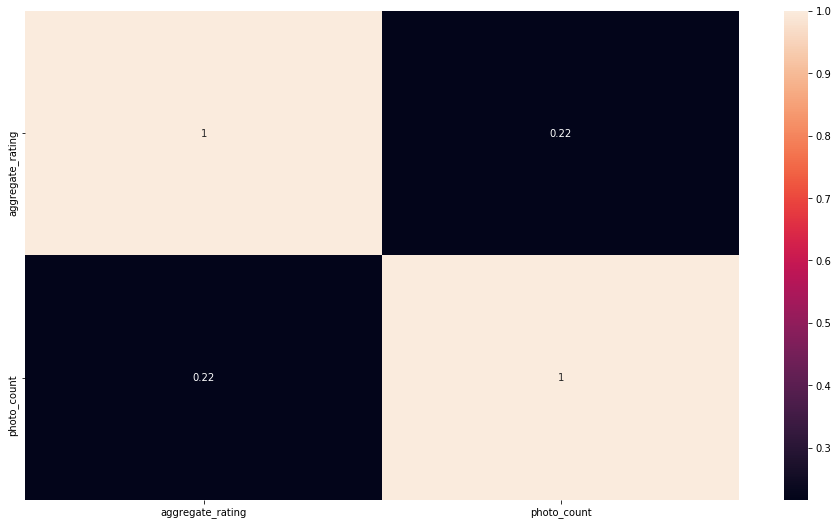

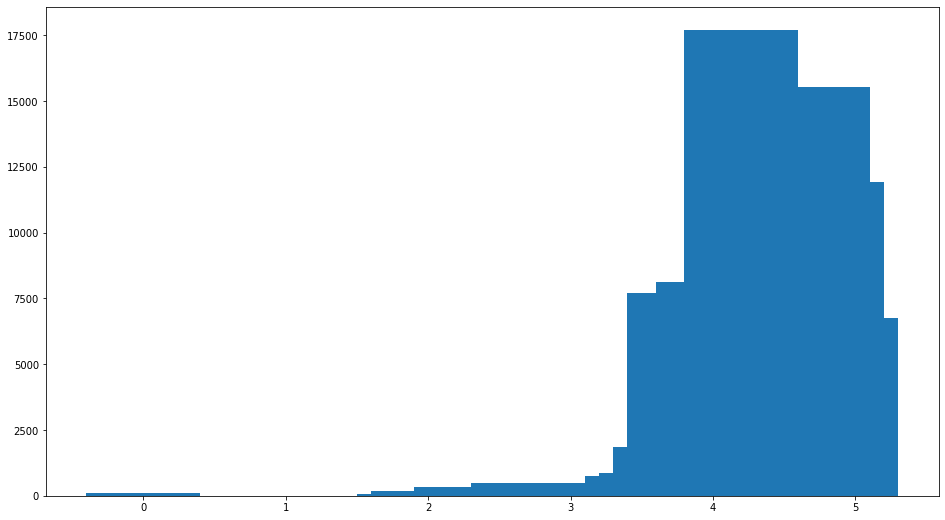

INFERENCE
photo_count and votes are positivley correlated.Hence from figure we can say that photo_count and votes increases rating


In [55]:
piv_corr_aggrate_phc=north_highlights[["aggregate_rating","photo_count"]]
corr_aggrate_phc=piv_corr_aggrate_phc.corr()
print(corr_aggrate_phc)
print("aggregate_rating & aggregate_rating =>(0.22) =>Weak positive correlation")
sb.heatmap(corr_aggrate_phc,annot=True)
plt.show()
plt.bar(north_highlights.aggregate_rating,north_highlights.photo_count)
plt.show()
print("INFERENCE")
print("photo_count and votes are positivley correlated.Hence from figure we can say that photo_count and votes increases rating")

### 4. The Mumbai city

Consider the city mumbai and get a better insights of restuarants in Mumbai.

In [56]:
print("Restaurants count : ",data.name[(data.city=="Mumbai")].count())
print("Restaurants with rating Good : ",data.rating_text[(data.city=="Mumbai") & (data.rating_text=="Good")].count())
print("Restaurants with rating Excellent : ",data.rating_text[(data.city=="Mumbai") & (data.rating_text=="Excellent")].count())
print("Restaurants with rating Average : ",data.rating_text[(data.city=="Mumbai") & (data.rating_text=="Average")].count())
print("Restaurants with rating Poor : ",data.rating_text[(data.city=="Mumbai") & (data.rating_text=="Poor")].count())
print("Restaurants Not rated : ",data.rating_text[(data.city=="Mumbai") & (data.rating_text=="Not rated")].count())
print("Restaurants with aggreagate rating > 4 : ",data.aggregate_rating[(data.city=="Mumbai") & (data.aggregate_rating>4)].count())
print("Restaurants with aggreagate rating < 2 : ",data.aggregate_rating[(data.city=="Mumbai") & (data.aggregate_rating<2)].count())
print("Unique cuisines in Restaurants : ",len(data.cuisines[(data.city=="Mumbai")].unique()))
print("Timing of majority of Restaurants : ",data.timings[(data.city=="Mumbai")].max())
print("Price of Restaurant with maximum average_cost_for_two: ",data.average_cost_for_two[(data.city=="Mumbai")].max())
print("Price of Restaurant with minimum average_cost_for_two: ",data.average_cost_for_two[(data.city=="Mumbai")].min())

Restaurants count :  2538
Restaurants with rating Good :  747
Restaurants with rating Excellent :  248
Restaurants with rating Average :  166
Restaurants with rating Poor :  68
Restaurants Not rated :  112
Restaurants with aggreagate rating > 4 :  1136
Restaurants with aggreagate rating < 2 :  114
Unique cuisines in Restaurants :  901
Timing of majority of Restaurants :  Mon-Tue, Thu-Sun (11 AM to 11:59 PM), Wed (11 AM to 11:55 PM)
Price of Restaurant with maximum average_cost_for_two:  30000
Price of Restaurant with minimum average_cost_for_two:  50


**1. Expensive restaurants in Mumbai**

-  Define the costliest restaurants whose average cost of two people exceeds Rs.5000 .
-  Plot the restaurants which are costliest based on their average cost for two .




135881                            Vista - Taj Lands End
135910                      Souk - The Taj Mahal Palace
135918        Wasabi By Morimoto - The Taj Mahal Palace
135924                             Celini - Grand Hyatt
135925              Masala Kraft - The Taj Mahal Palace
135943                            San-Qi - Four Seasons
136060                        Bombay High - ITC Maratha
136240    Ocean - The Private Dining Room - Sahara Star
136242                     Yuuka - The St. Regis Mumbai
136245           Le Cirque Signature - The Leela Mumbai
138601                      Souk - The Taj Mahal Palace
141171                             Celini - Grand Hyatt
Name: name, dtype: object


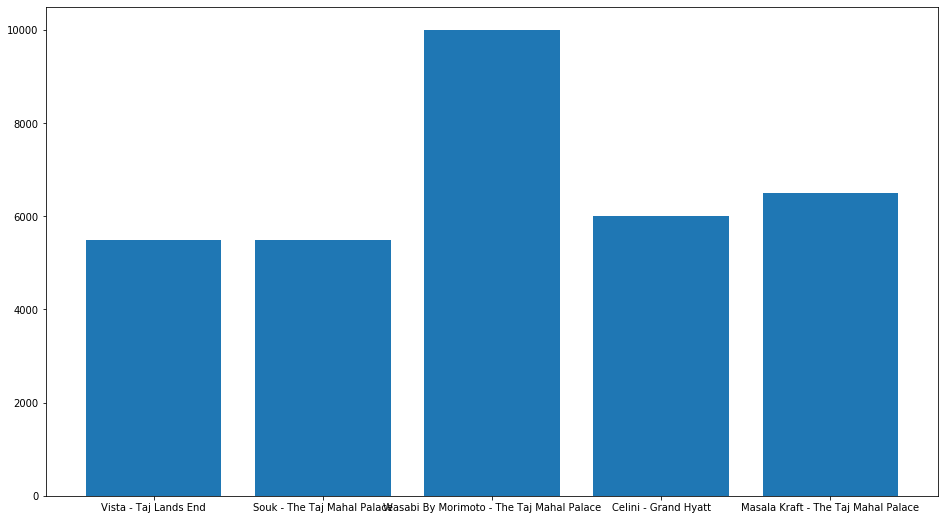

In [57]:
costliest_mumbai=data[(data.city=="Mumbai")&(data.average_cost_for_two>5000)]
print(costliest_mumbai.name)
plot_costliest_mumbai=costliest_mumbai.head(5)
plt.bar(plot_costliest_mumbai.name,plot_costliest_mumbai.average_cost_for_two)
plt.show()

**2.To find the top 20 cuisines of Mumbai**

- select unique cuisines available at restaurants in Mumbai


- sort cuisines based on frequency


In [58]:
piv=data[data.city=="Mumbai"]
mum_20_cuisines=piv.groupby("cuisines").count()
mum_20_cuisines=mum_20_cuisines.sort_values("name",ascending=False)
mum_20_cuisines.iloc[:21,0]

cuisines
Bakery, Desserts                            71
North Indian                                51
Fast Food                                   49
Beverages, Desserts, Ice Cream              44
Ice Cream, Desserts                         38
Paan                                        35
Mithai, Street Food                         35
Cafe, Desserts                              30
Desserts, Beverages                         30
Bakery, Desserts, Fast Food                 30
Finger Food                                 29
Street Food                                 28
Burger, Fast Food                           25
Fast Food, Healthy Food, Sandwich, Salad    24
Pizza, Fast Food                            24
Desserts                                    23
Mithai                                      23
North Indian, Mughlai                       22
Desserts, Ice Cream                         21
Beverages, Fast Food                        21
Chinese                                     20
Name

**3. To find the popular localities in Mumbai**

In [59]:
mum_10_locality=piv.groupby("locality").count()
mum_10_locality=mum_10_locality.sort_values("name",ascending=False)
mum_10_locality.iloc[:11,0]

locality
Andheri Lokhandwala, Andheri West    104
Powai                                 92
Malad West                            87
Borivali West                         84
Pali Hill, Bandra West                67
Fort                                  64
Khar                                  60
Juhu                                  58
Kandivali West                        56
Lower Parel                           56
Mira Road                             51
Name: name, dtype: int64

**4. Check for relationship between 'aggregate_rating' and 'average_cost_for_two'**

                      average_cost_for_two  aggregate_rating
average_cost_for_two              1.000000          0.255379
aggregate_rating                  0.255379          1.000000
INFERENCE
aggregate_rating & aggregate_rating =>(0.26) =>Weak positive correlation


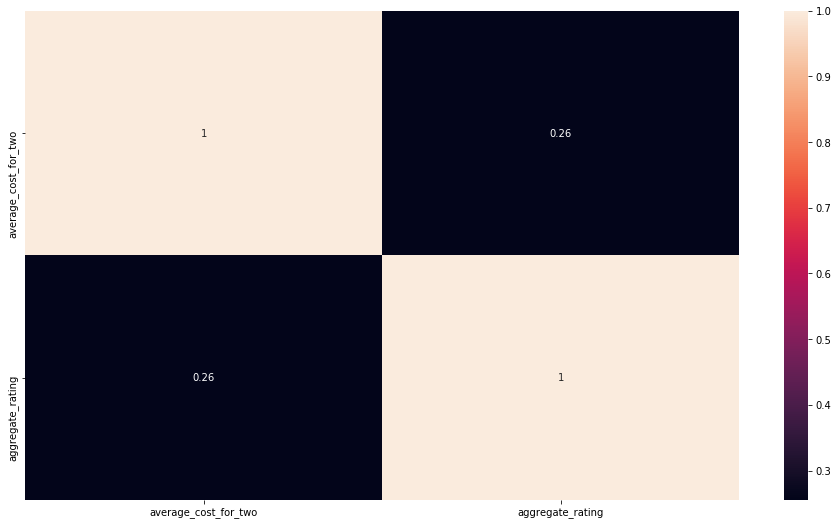

In [60]:
piv_corr_aggrate_avgcost=data[["average_cost_for_two","aggregate_rating"]]
corr_aggrate_avgcost=piv_corr_aggrate_avgcost.corr()
print(corr_aggrate_avgcost)
print("INFERENCE")
print("aggregate_rating & aggregate_rating =>(0.26) =>Weak positive correlation")
sb.heatmap(corr_aggrate_avgcost,annot=True)
plt.show()

**5. Check for payments method offered in restaurants**

- select unique facilities available at restaurants in western region
- sort facilities based on frequency


In [61]:
data=data.replace(np.nan,"None")
payment_methods=["Cash","Debit Card","Credit Card","Digital Payments Accepted"]
piv=data[data.region=="western"]
res={}
for each in payment_methods:
    res.update({each:piv.locality[piv["highlights"].str.contains(each,regex=False)].count()})

datacop_payment=pd.DataFrame(res.items())
print(datacop_payment.sort_values(by=1,ascending=False).head())

                           0      1
0                       Cash  16087
2                Credit Card   8884
1                 Debit Card   8175
3  Digital Payments Accepted   5380
